In [1]:
import pandas as pd
from sklearn import set_config
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.svm import SVC

set_config(print_changed_only=False)

## prepare the data

In [2]:
df = pd.read_csv('../data/Iris.csv')
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

x = df.iloc[:, 0:4]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x.values,
    y.values,
    test_size=0.33,
    shuffle=True,
    random_state=42,
)

## scale the x data

In [3]:
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

## build an SVM model

In [4]:
svm_model = SVC(random_state=42)
svm_model.fit(X=x_train_scaled, y=y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

c:\Users\kittnjdr\.conda\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


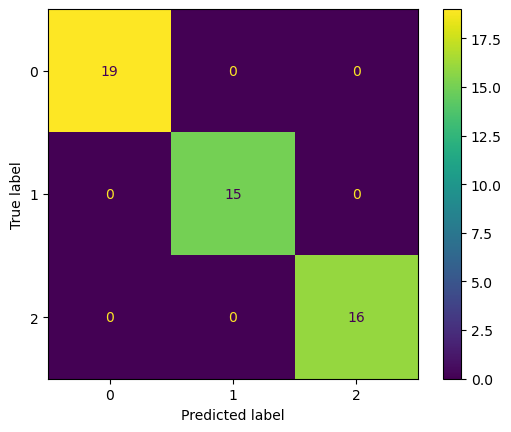

In [5]:
plot_confusion_matrix(svm_model, x_test_scaled, y_test)

## parameter tuning

In [6]:
# create a dict with all parameters we want to test
param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
}
# test all combinations
optimal_params = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
)
optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}


## use above calculated parameters

c:\Users\kittnjdr\.conda\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


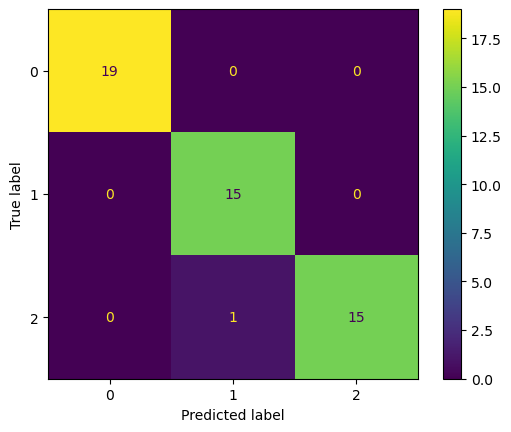

In [7]:
svm_model = SVC(random_state=42, C=0.5, gamma=0.1)
svm_model.fit(X=x_train_scaled, y=y_train)
plot_confusion_matrix(svm_model, x_test_scaled, y_test)